# TTT4275 Classification Project: Music Classification

In [1]:
# Imports
import copy

import source.data_handling
import source.mappings
import source.plotting
import source.diy_classifiers

import numpy as np
import sklearn.preprocessing

# uncomment following line and restart the kernel for interactive plots 
#%matplotlib notebook

In [2]:
# Load the dataset and split into training and test
# X = M x N dataset with M samples of N features

data_version = source.data_handling.GENRE_CLASS_DATA_30S
data_frame = source.data_handling.read_genre_class_data(data_version)

all_features = source.mappings.MUSIC_FEATURES_ALL

scaled_data_frame = copy.deepcopy(data_frame)
scaler = sklearn.preprocessing.MaxAbsScaler()
scaler.fit(data_frame[all_features])

scaled_data_frame[all_features] = scaler.transform(scaled_data_frame[all_features])

## Task 1

Using only the four features given in task 1a), we plot the confusion matrix and error rate for all genres.

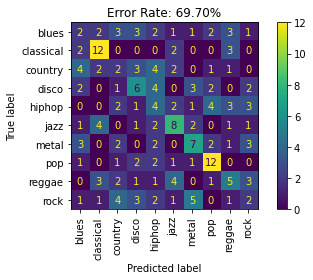

In [3]:
# kNN parameters
k = 5
features_task_1 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=scaled_data_frame,
    features=features_task_1,
)

classifier = source.diy_classifiers.kNN(k=5, p=2)
classifier.fit(data_frame_x=training_data.x, data_frame_y=training_data.y)
y_pred_task1 = classifier.predict(test_data.x)

y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

Using the above confusion matrix we can take some genres and plot their overlap.
Good contenders are blues vs. country and pop vs. disco as they both have a total of nine misclassifications each.

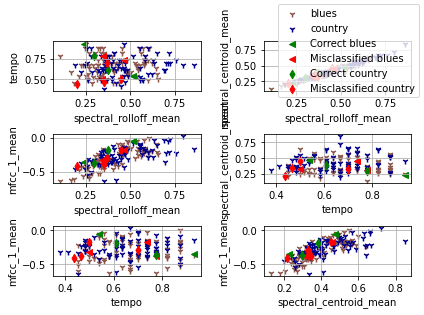

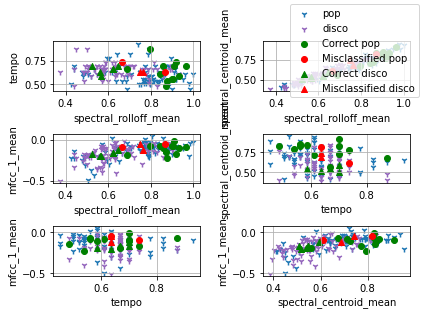

In [4]:
import copy

genre_combos = [
    ["blues", "country"],
    ["pop", "disco"],
]

def apply_indices_to_dataset(
    data_set,
    indices,
):
    data_set.x = data_set.x.iloc[indices]
    data_set.y = data_set.y.iloc[indices]
    data_set.track_ids = data_set.track_ids.iloc[indices]
    
    return data_set

for combo in genre_combos:
    # Filter out all indices that should be either of the two genres and are classified
    # as either of the two given genres
    train_genre_indices = np.flatnonzero(
        np.array(training_data.data_frame["Genre"] == combo[0])
        + np.array(training_data.data_frame["Genre"] == combo[1])
    )
    test_genre_indices = np.flatnonzero(
        np.array(test_data.data_frame["Genre"] == combo[0])
        + np.array(test_data.data_frame["Genre"] == combo[1])
    )
    
    result_indices = np.flatnonzero((y_pred_task1 == combo[0]) + (y_pred_task1 == combo[1])) 
    test_indices = list(filter(lambda x: x in test_genre_indices, result_indices))

    train_data_copy = copy.deepcopy(training_data)
    test_data_copy = copy.deepcopy(test_data)
    
    # Plot the training data for the two given genres and plot the data points
    # from the test data and if they were correctly / falsely classified
    source.plotting.misclassifications_scatter_plot(
        training_data=apply_indices_to_dataset(train_data_copy, train_genre_indices),
        test_data=apply_indices_to_dataset(test_data_copy, test_indices),
        predicted_genres=y_pred_task1[test_indices],
        features=features_task_1,
        genres=combo,
    )

### KNN Parameters
Using all features we plot the error rates with respect to the number of neighbors and using different orders of the Minkowski order (p).
Once for our own implementation of the kNN classifier

In [5]:
ks = np.arange(20) + 1
ps = np.arange(10) + 1

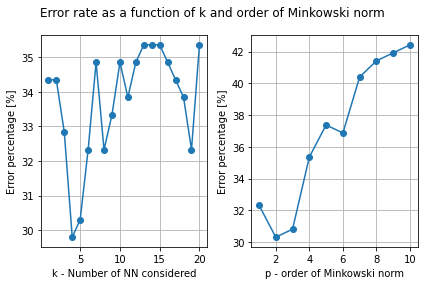

In [6]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=scaled_data_frame,
)

source.plotting.error_rates_vs_params(ks, ps, training_data, test_data, diy=True)

And another time for the sklearn implementation

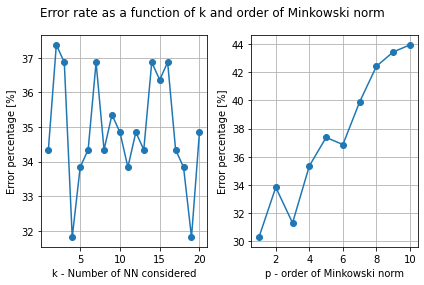

In [7]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=scaled_data_frame,
)

source.plotting.error_rates_vs_params(ks, ps, training_data, test_data, diy=False)

A larger number of neighbors to take into consideration could be beneficial when using KNN. Although the improvement is only small. Regarding the order of the Minkowski distance, interestingly the first order or Manhatten distance seems to perform the best and subsequent orders have worse error rates.
For both of these plots the improvement is not negligeable but small nonetheless.

## Task 2

In [8]:
features_task_2 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]
genres_task_2 = ["pop", "disco", "metal", "classical"]

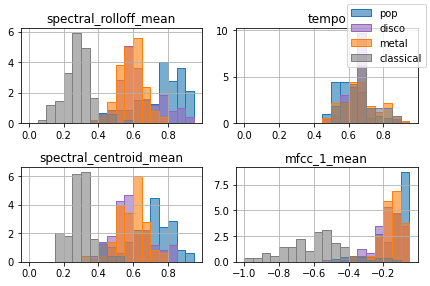

In [9]:
source.plotting.feature_distribution_histogram(
    data_frame=scaled_data_frame,
    features=features_task_2,
    genres=genres_task_2,
)

As the tempo feature seems to have the largest overlap between the classes, we remove that feature and run the knn classifier from task 1 for all genres again.

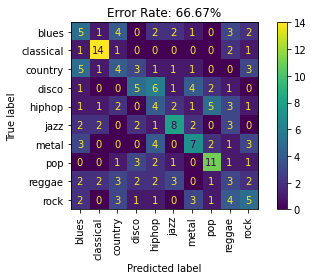

In [10]:
reduced_features_task_2 = ["spectral_rolloff_mean", "spectral_centroid_mean", "mfcc_1_mean"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=scaled_data_frame,
    features=reduced_features_task_2,
)

classifier = source.diy_classifiers.kNN(k=5, p=2)
classifier.fit(data_frame_x=training_data.x, data_frame_y=training_data.y)
y_pred_task1 = classifier.predict(test_data.x)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

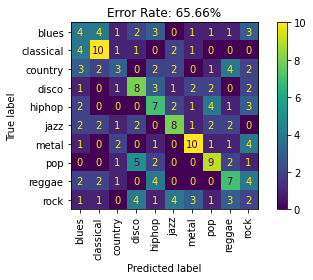

In [11]:
reduced_features_task_2 = ["spectral_rolloff_mean", "spectral_centroid_mean", "tempo"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=scaled_data_frame,
    features=reduced_features_task_2,
)

classifier = source.diy_classifiers.kNN(k=5, p=2)
classifier.fit(data_frame_x=training_data.x, data_frame_y=training_data.y)
y_pred_task1 = classifier.predict(test_data.x)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

For whatever reason removing the tempo does not seem to have a valueable impact on the error rate of the classifier -> this was because the data was not normalized and tempo did not have a large impact on the distance.

Using only one of the features we run the classifier for only four of the genres and take a look at the performance.

spectral_rolloff_mean


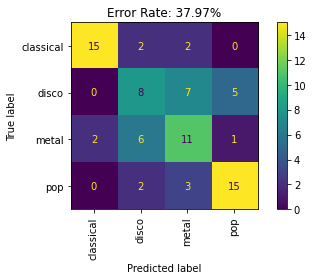

tempo


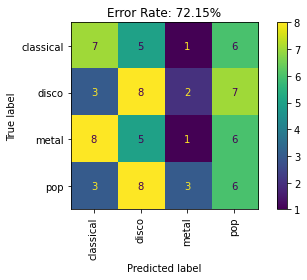

spectral_centroid_mean


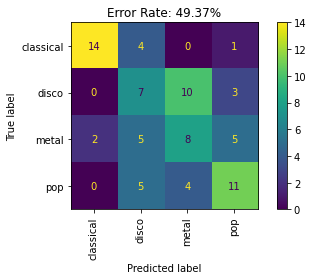

mfcc_1_mean


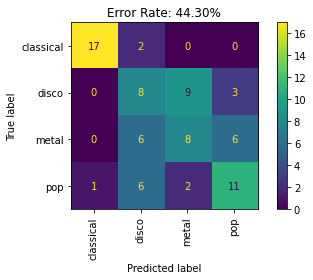

In [12]:
for feature in features_task_2:
    training_data, test_data = source.data_handling.prepare_data(
        data_frame=scaled_data_frame,
        features=[feature],
        genres=genres_task_2,
    )

    classifier = source.diy_classifiers.kNN(k=5, p=2)
    classifier.fit(data_frame_x=training_data.x, data_frame_y=training_data.y)
    y_pred_task1 = classifier.predict(test_data.x)
    y_true_task1 = test_data.y

    print(f"{feature}")
    source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

Because the assignment mentions four experiments and the previous subtask talks about removing one of the four features, we also plot the confusion matrix for all possibilities of only three features of the given four. (We should probably use cross validation for this instead).

['spectral_rolloff_mean' 'tempo' 'spectral_centroid_mean']


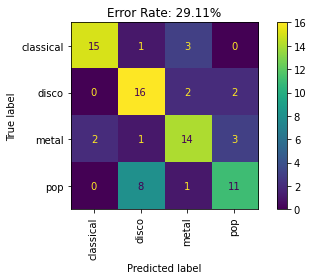

['spectral_rolloff_mean' 'spectral_centroid_mean' 'mfcc_1_mean']


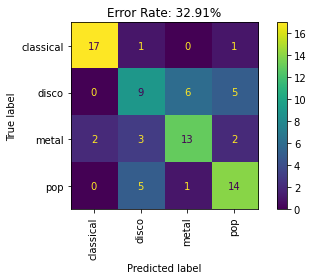

['spectral_rolloff_mean' 'tempo' 'mfcc_1_mean']


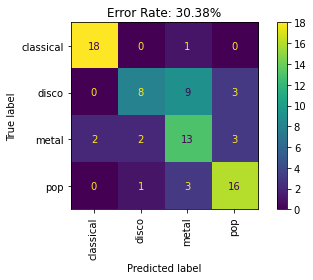

['tempo' 'spectral_centroid_mean' 'mfcc_1_mean']


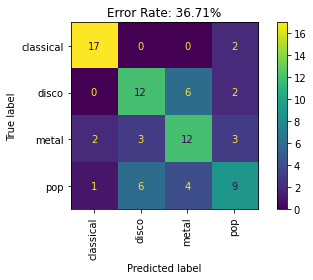

In [13]:
combinations = [
    [0,1,2],
    [0,2,3],
    [0,1,3],
    [1,2,3],
]

for combo in combinations:
    features = np.array(features_task_2)[combo]
    training_data, test_data = source.data_handling.prepare_data(
        data_frame=scaled_data_frame,
        features=features,
        genres=genres_task_2,
    )

    classifier = source.diy_classifiers.kNN(k=5, p=2)
    classifier.fit(data_frame_x=training_data.x, data_frame_y=training_data.y)
    y_pred_task1 = classifier.predict(test_data.x)
    y_true_task1 = test_data.y

    print(f"{features}")
    source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

## Task 3
Here Cross Validation is performed to asses which extra 4th feature results in the best model.

Note: this code might take a while to run.


In [4]:
from task03 import task3_feature_selection

data_version = source.data_handling.GENRE_CLASS_DATA_30S
data_set = source.data_handling.read_genre_class_data(data_version)

features_task_3 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]
# Remove Tempo
remove_feature_ind = 1
features_task_3.pop(remove_feature_ind)

add_features = source.mappings.MUSIC_FEATURES_ALL.copy()
for feature in features_task_3:
    add_features.remove(feature)

training_data, _ = source.data_handling.prepare_data(
        data_frame=data_set,
        features=source.mappings.MUSIC_FEATURES_ALL,
    )

add_features_PIs = task3_feature_selection(training_set=training_data, fast_features=features_task_3, add_features=add_features)

best_ind = np.argmin(add_features_PIs)
five_best_inds = np.argpartition(add_features_PIs, 5)[:5]

print(f"The best extra feature to add is: {add_features[best_ind]} with validation Error Rate of: {add_features_PIs[best_ind]}")
print(f"The best 5 extra features are: {[add_features[i] for i in five_best_inds]} with validation Error Rates of: {[add_features_PIs[i] for i in five_best_inds]}")

The best extra feature to add is: spectral_rolloff_var with an Error Rate of: 62.08679927667269
The best 5 extra features are: ['spectral_bandwidth_var', 'mfcc_5_mean', 'tempo', 'spectral_rolloff_var', 'spectral_centroid_var'] with Error Rates of: [64.97616307742891, 66.28144007890843, 66.1498643761302, 62.08679927667269, 63.48614992602334]


## Task 4

The current idea for our classifier design is to do three steps:
1. Scaling
2. Dimension Reduction
3. Classification

## Cross Validation and Evaluation of PLSR-DA Classifier
Note: this code might take some time to run.

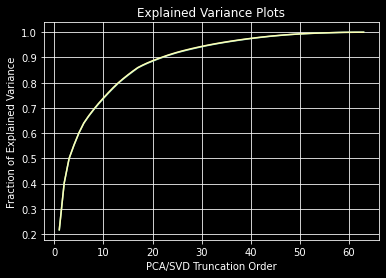

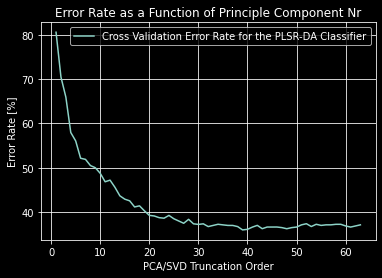

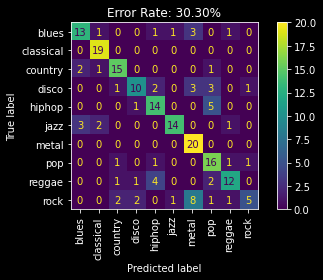

In [3]:
from task04 import validate_plsr_da

data_version = source.data_handling.GENRE_CLASS_DATA_30S
data_frame = source.data_handling.read_genre_class_data(data_version)

scaled_data_frame = copy.deepcopy(data_frame)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(data_frame[source.mappings.MUSIC_FEATURES_ALL])

scaled_data_frame[source.mappings.MUSIC_FEATURES_ALL] = scaler.transform(scaled_data_frame[source.mappings.MUSIC_FEATURES_ALL])
genres = list(source.mappings.GENRES.values())

training_data, test_data = source.data_handling.prepare_data(
            data_frame=scaled_data_frame,
            features=source.mappings.MUSIC_FEATURES_ALL,
        )

CV_vars = source.descriptive_statistics.cross_validate_pca(training_x=training_data.x, training_y=training_data.y, nr_segments=5)
Scores, P, singular_values, cum_var = source.descriptive_statistics.perform_PCA(training_data.x)

principle_components_PIs = validate_plsr_da(training_set=training_data)

# Plots for evaluation
source.plotting.task04_plots(cum_var=cum_var, CV_vars=CV_vars, pc_PIs=principle_components_PIs)

# PLSR_DA
myClassifier = source.diy_classifiers.PLSR_DA(n_components=20)
myClassifier.fit(training_data.x, training_data.y)

y_genres_pred = myClassifier.predict(test_data=test_data.x)
source.plotting.confusion_matrix(test_data.y, y_genres_pred)

#### Scaling
There are a few different methods of scaling the input data. First and foremost the effect of having scaling versus not having scaling at all is taken into consideration.

In [15]:
import sklearn.decomposition
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm

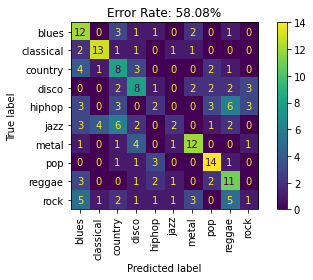

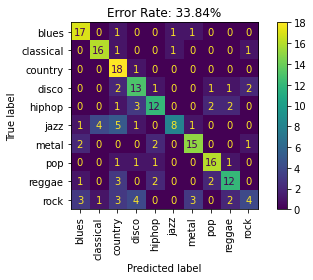

In [16]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

pipelines = [
    sklearn.pipeline.Pipeline([
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ]),
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ]),
]

for pipeline in pipelines:
    pipeline.fit(training_data.x, training_data.y)
    predict_y = pipeline.predict(test_data.x)
    
    source.plotting.confusion_matrix(test_data.y, predict_y)

#### Dimension Reduction
Instead of having to run the classifier on all dimensions we can try to reduce the dimensions. For the KNN approach this will help with computing the distances once the dataset actually gets larger.
For now we can think of using:
- principle component analysis
- partial least squares discriminant analysis
- autoencoder

##### Principle Component Analysis

KNN - no PCA all features


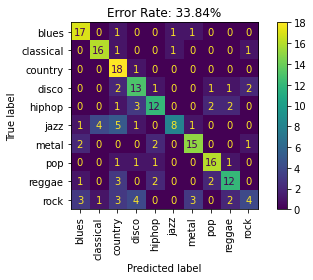

KNN - all PCA components


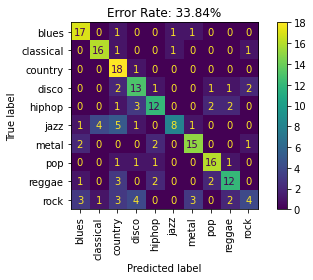

KNN - 15 first PCA components


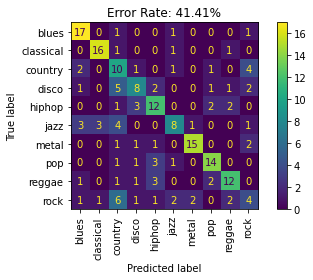

SVM - no PCA all features


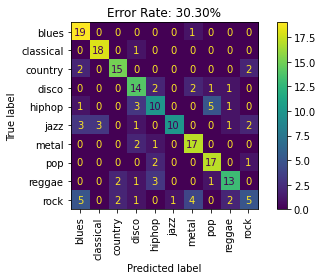

SVM - all PCA components


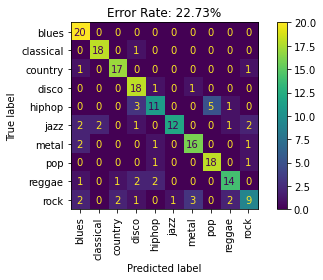

SVM - 15 first PCA components


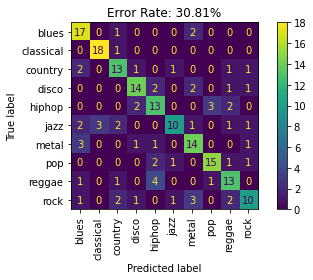

In [17]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

pca_pipelines = [
    ('KNN - no PCA all features', sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('KNN - all PCA components', sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('KNN - 15 first PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA(n_components=15)),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('SVM - no PCA all features',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
    ('SVM - all PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA()),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
    ('SVM - 15 first PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA(n_components=15)),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
]

for name, pipeline in pca_pipelines:
    print(name)
    pipeline.fit(training_data.x, training_data.y)
    predict_y = pipeline.predict(test_data.x)
    
    source.plotting.confusion_matrix(test_data.y, predict_y)

The observed results would imply that PCA does not positively affect the KNN classifier in anyway, but it could do so when using an SVM as the classifier method.

#### Classifier
So far we have only used the KNN classifier. Here we can also consider alternatives and the list to explore could look like:
- KNN
- Support Vector Machines
- Multi Layer Perceptron